#### LINKS

- https://medium.com/dataman-in-ai/explain-your-model-with-the-shap-values-bc36aac4de3d
- https://github.com/dataman-git/codes_for_articles/blob/master/Explain%20your%20model%20with%20the%20SHAP%20values%20for%20article.ipynb

In [8]:
import pandas as pd
import numpy as np
import plotly
np.random.seed(0)
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r'C:\Users\MJAR0016\Desktop\data_4_SHAP.csv')
df.head()

,Video_Name,Type,Openface_gaze_child,Fer_emotions_child,hand_left_x_adult,hand_left_y_adult,hand_right_x_adult,hand_right_y_adult,head_x_adult,head_y_adult,hand_left_x_child,hand_left_y_child,hand_right_x_child,hand_right_y_child,head_x_child,head_y_child,Total_video_red_body,Total_video_red_head,Type_enc
0,2023_CFLH,Control,0.367,0.001799,0.127726,0.048561,0.122745,0.050315,0.099885,0.034279,0.200317,0.096824,0.082856,0.097622,0.182887,0.057123,0.000000,0.000000,0
1,2025_SRF,Control,0.374,0.203160,0.247773,0.211057,0.218768,0.214073,0.198482,0.149894,0.049753,0.028589,0.037262,0.029972,0.048221,0.026176,0.000099,0.000000,0
2,2048_VMY,Control,0.485,0.007679,0.149614,0.108114,0.176780,0.087354,0.124731,0.054382,0.153328,0.101382,0.054481,0.105798,0.130008,0.073737,0.000192,0.000048,0
3,2053_HCK,Control,0.377,0.002789,0.067173,0.034553,0.072553,0.032087,0.062592,0.033870,0.115682,0.067241,0.088655,0.070538,0.116464,0.054508,0.000000,0.000000,0
4,2055_CP,Control,0.329,0.022569,0.215708,0.257767,0.234966,0.258505,0.185188,0.198978,0.197849,0.152850,0.095717,0.149772,0.166600,0.102052,0.000000,0.000000,0


In [9]:
import shap
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

with open(r'C:\Users\MJAR0016\Desktop\data_4_SHAP.csv') as f:
 X = pd.read_csv(f,usecols=['Openface_gaze_child' ,'Fer_emotions_child', 'hand_left_x_adult', 'hand_left_y_adult','hand_right_x_adult','hand_right_y_adult','head_x_adult','head_y_adult','hand_left_x_child','hand_left_y_child','hand_right_x_child','hand_right_y_child','head_x_child','head_y_child'])
f.close()
X.head(10)
Y = df['Total_video_red_body']

<AxesSubplot: >

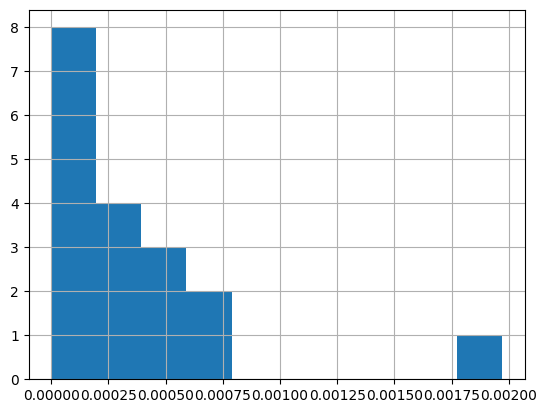

In [4]:
df['Total_video_red_body'].hist()

In [10]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

model = RandomForestRegressor(max_depth=6, random_state=0, n_estimators=10)
model.fit(X_train, Y_train)  
print(model.feature_importances_)

[0.05537826 0.02468153 0.0950436  0.0781072  0.0742391  0.17732405
 0.08708912 0.10715268 0.10088245 0.02688608 0.00613473 0.08209537
 0.00235234 0.0826335 ]


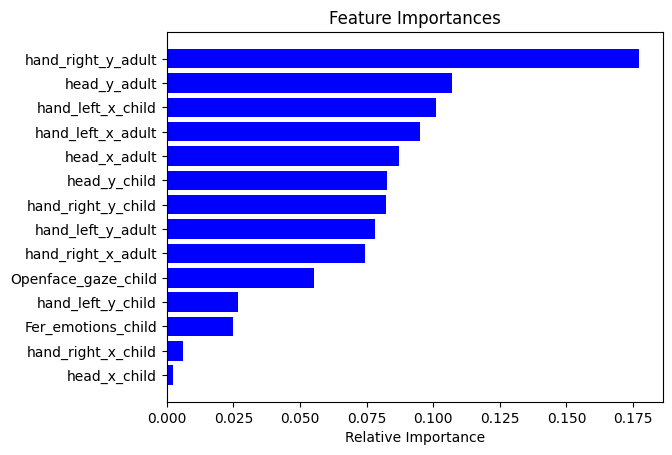

In [11]:
importances = model.feature_importances_
indices = np.argsort(importances)

features = X_train.columns
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

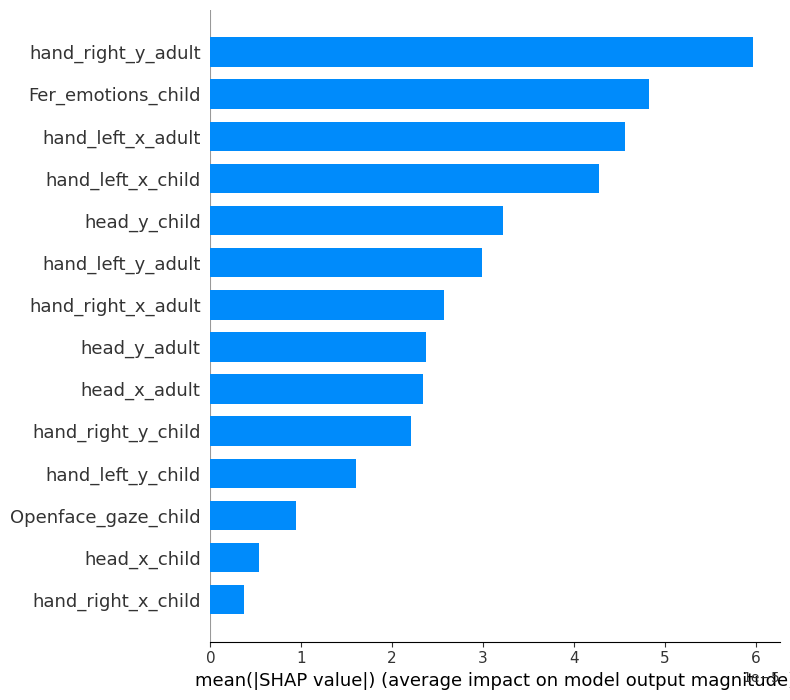

In [12]:
import shap

shap_values = shap.TreeExplainer(model).shap_values(X_train)

shap.summary_plot(shap_values, X_train, plot_type="bar")

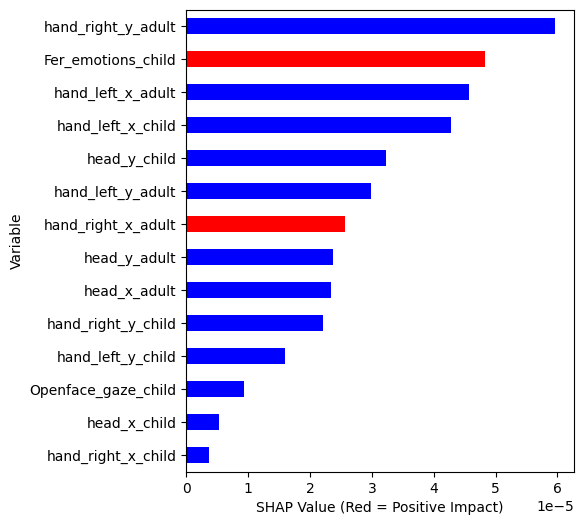

In [13]:
def ABS_SHAP(df_shap,df):
    #import matplotlib as plt
    # Make a copy of the input data
    shap_v = pd.DataFrame(df_shap)
    feature_list = df.columns
    shap_v.columns = feature_list
    df_v = df.copy().reset_index().drop('index',axis=1)
    
    # Determine the correlation in order to plot with different colors
    corr_list = list()
    for i in feature_list:
        b = np.corrcoef(shap_v[i],df_v[i])[1][0]
        corr_list.append(b)
    corr_df = pd.concat([pd.Series(feature_list),pd.Series(corr_list)],axis=1).fillna(0)
    # Make a data frame. Column 1 is the feature, and Column 2 is the correlation coefficient
    corr_df.columns  = ['Variable','Corr']
    corr_df['Sign'] = np.where(corr_df['Corr']>0,'red','blue')
    
    # Plot it
    shap_abs = np.abs(shap_v)
    k=pd.DataFrame(shap_abs.mean()).reset_index()
    k.columns = ['Variable','SHAP_abs']
    k2 = k.merge(corr_df,left_on = 'Variable',right_on='Variable',how='inner')
    k2 = k2.sort_values(by='SHAP_abs',ascending = True)
    colorlist = k2['Sign']
    ax = k2.plot.barh(x='Variable',y='SHAP_abs',color = colorlist, figsize=(5,6),legend=False)
    ax.set_xlabel("SHAP Value (Red = Positive Impact)")
    
ABS_SHAP(shap_values,X_train)

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


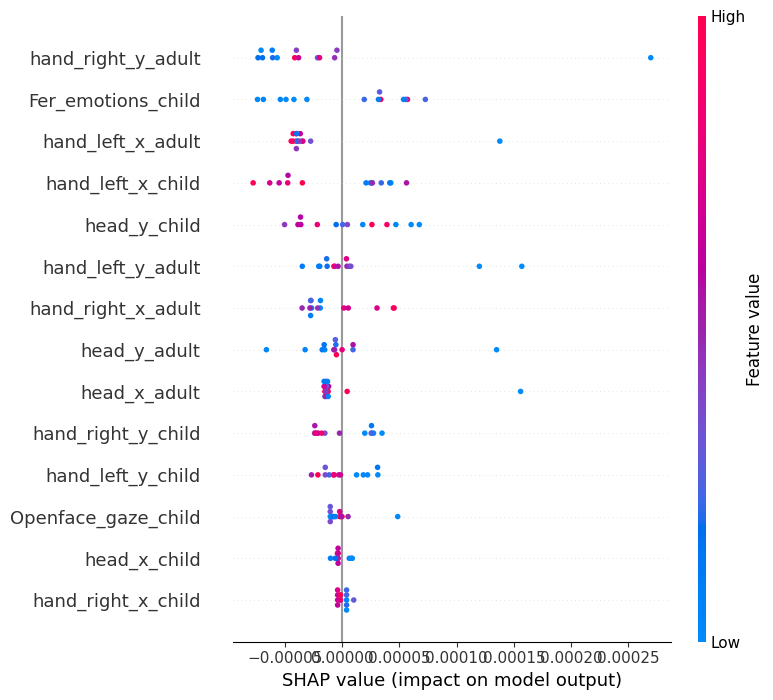

In [14]:
shap.summary_plot(shap_values, X_train)

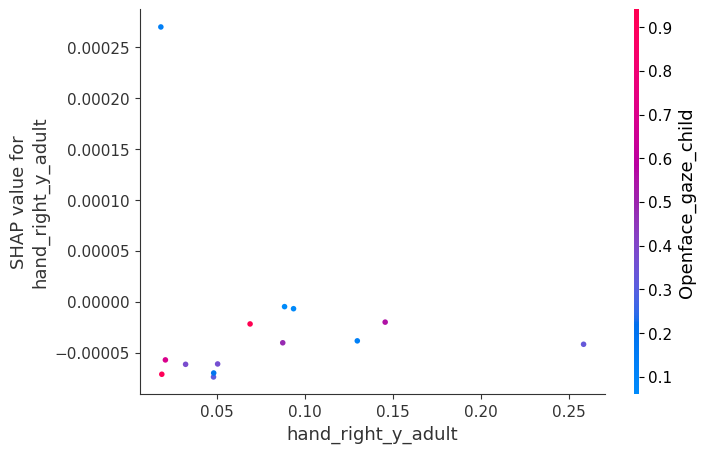

In [15]:
shap.dependence_plot("hand_right_y_adult", shap_values, X_train)

In [18]:
import xgboost
shap.plots.heatmap(shap_values[:18])

AttributeError: 'numpy.ndarray' object has no attribute 'values'